# データの可視化

Pythonを使ったデータの可視化を行う. 

基本的には、描きたいグラフの種類に合わせて必要なデータ構造とその出力を探せるようにしたい.

パッケージは小回りが効きやすい、`matplotlib`と`seaborn`を利用する.

## 導入

matplotlibにはグラフの書き方が2種類ある.  

FigureとAxesを利用する書き方（Type 2）に統一して記載する.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# グラフ表示用
from IPython.display import display

Text(0.5, 1.0, 'Type 2')

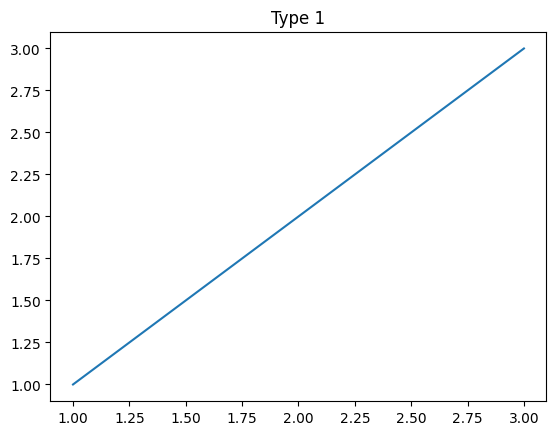

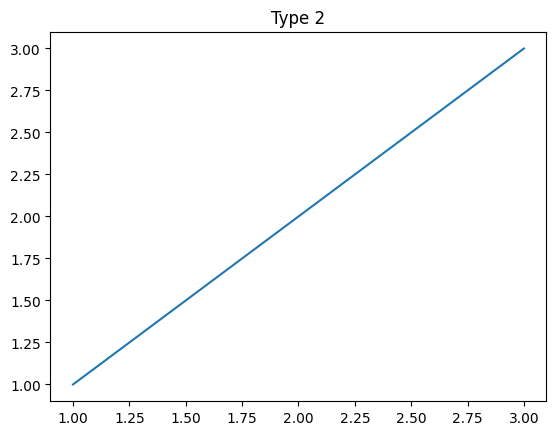

In [2]:
# 書き方1
plt.plot([1, 2, 3], [1, 2, 3])
plt.title("Type 1")

# 書き方2
fig, ax = plt.subplots(1, 1)
ax.plot([1, 2, 3], [1, 2, 3])
ax.set_title("Type 2")

## 線グラフ

### mapltotlib
- 関数: `ax.plot`
- 入力データ: x軸、y軸それぞれのデータ

色分けしたい時は、必要なデータの組み合わせを複数用意し、`ax.plot`を引きたい線の数だけ実行する

入力データ


,x,y1,y2
9,9,19,-6
7,7,15,-4
2,2,5,1
17,17,35,-14
12,12,25,-9


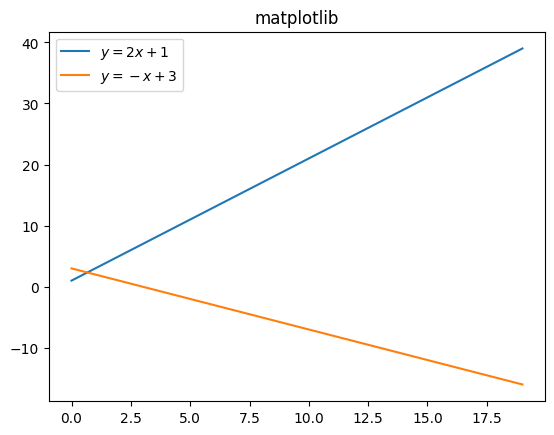

In [3]:
df = pd.DataFrame({
    "x": range(20)
})

# y = 2x + 1 のグラフ
df["y1"] = df["x"] * 2 + 1
# y = -x + 3 のグラフ
df["y2"] = -1 * df["x"] + 3

print("入力データ")
display(df.sample(5))


fig, ax = plt.subplots()

ax.plot(df["x"], df["y1"], label="$ y= 2x+1 $")
ax.plot(df["x"], df["y2"], label="$ y= -x+3 $")

ax.set_title("matplotlib")
ax.legend()

plt.show()

### seaborn
- 関数: `sns.lineplot`
- 入力データ: x軸、y軸それぞれのデータ

色分けしたい場合、色分けのカラムを用意して`hue`引数を利用する.

pandas DataFrameを利用して`data`引数に指定することで、軸に指定するデータを列名で代用できる

入力データ


,x,label,y
0,0,$ y=-x+3 $,3
4,4,$ y=-x+3 $,-1
14,14,$ y=-x+3 $,-11
4,4,$ y=2x+1 $,9
19,19,$ y=2x+1 $,39


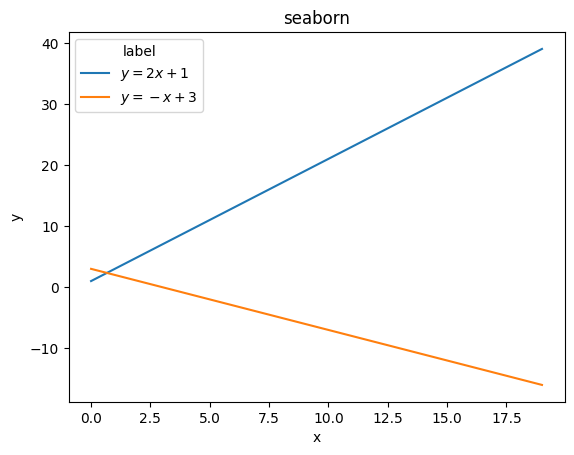

In [4]:
# データの用意
# 列で管理する必要があるので、それぞれ作成し縦方向に結合する

# y = 2x + 1 のグラフ
df1 = pd.DataFrame({
    "x": range(20),
    "label": "$ y=2x+1 $",
})
df1["y"] = df1["x"] * 2 + 1
# y = -x + 3 のグラフ
df2 = pd.DataFrame({
    "x": range(20),
    "label": "$ y=-x+3 $",
})
df2["y"] = -1 * df2["x"] + 3

# 縦方向に結合
df = pd.concat([df1, df2], axis=0)
print("入力データ")
display(df.sample(5))

fig, ax = plt.subplots()

sns.lineplot(
    x="x",
    y="y",
    data=df,
    hue="label",
    ax=ax,
)

# これでもいい
# sns.lineplot(
#     x=df["x"],
#     y=df["y"],
#     hue=df["label"],
#     ax=ax,
# )

ax.set_title("seaborn")

plt.show()

## 散布図

### matplotlib
- 関数: `ax.scatter`
- 入力データ: x軸、y軸それぞれのデータ

色分けしたい時は、必要なデータの組み合わせを複数用意し、`ax.scatter`を引きたい点の群の種類だけ実行する

入力データ


,x,y1,y2
0,0,1,3
7,7,15,-4
11,11,23,-8
18,18,37,-15
13,13,27,-10


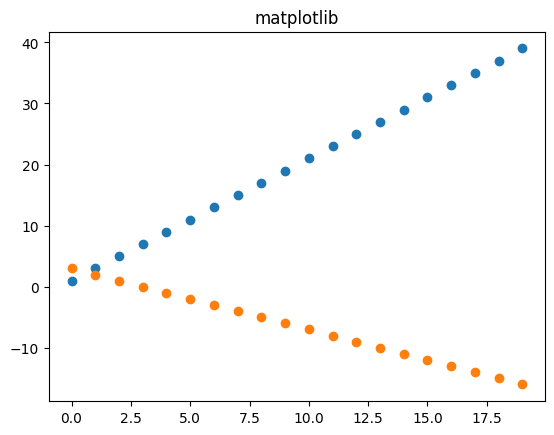

In [5]:
df = pd.DataFrame({
    "x": range(20)
})

# y = 2x + 1 のグラフ
df["y1"] = df["x"] * 2 + 1
# y = -x + 3 のグラフ
df["y2"] = -1 * df["x"] + 3

print("入力データ")
display(df.sample(5))


fig, ax = plt.subplots()

ax.scatter(df["x"], df["y1"], label="$ y= 2x+1 $")
ax.scatter(df["x"], df["y2"], label="$ y= -x+3 $")

ax.set_title("matplotlib")

plt.show()

### seaborn
- 関数: `sns.scatterplot`
- 入力データ: x軸、y軸それぞれのデータ

色分けしたい場合、色分けのカラムを用意して`hue`引数を利用する.

pandas DataFrameを利用して`data`引数に指定することで、軸に指定するデータを列名で代用できる

入力データ


,x,label,y
8,8,$ y=2x+1 $,17
17,17,$ y=-x+3 $,-14
12,12,$ y=2x+1 $,25
15,15,$ y=2x+1 $,31
5,5,$ y=2x+1 $,11


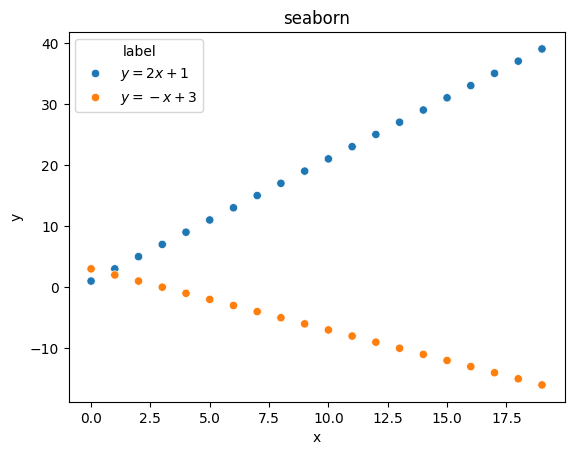

In [6]:
df1 = pd.DataFrame({
    "x": range(20),
    "label": "$ y=2x+1 $",
})
df1["y"] = df1["x"] * 2 + 1
# y = -x + 3 のグラフ
df2 = pd.DataFrame({
    "x": range(20),
    "label": "$ y=-x+3 $",
})
df2["y"] = -1 * df2["x"] + 3

# 縦方向に結合
df = pd.concat([df1, df2], axis=0)

print("入力データ")
display(df.sample(5))


fig, ax = plt.subplots()

sns.scatterplot(
    x="x",
    y="y",
    hue="label",
    data=df,
)

ax.set_title("seaborn")

plt.show()

## 棒グラフ

### matplotlib
- 関数: `ax.bar`
- 入力データ: x軸、y軸それぞれのデータ

色分けしたい時は、必要なデータの組み合わせを複数用意し、`ax.bar`を引きたい点の群の種類だけ実行する

入力データ


,x,y1,y2
0,a,10,3
1,b,5,10
2,c,-3,2
3,d,20,-5


<BarContainer object of 4 artists>

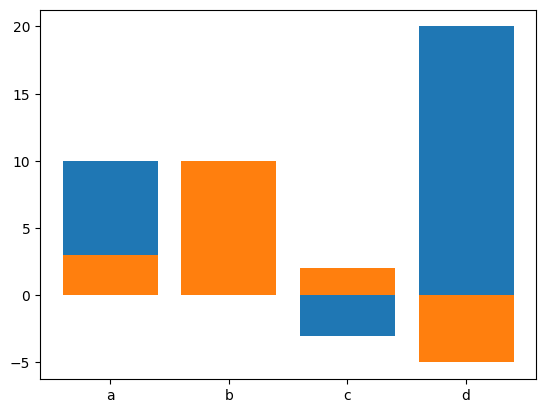

In [7]:
df = pd.DataFrame({
    "x": ["a", "b", "c", "d"],
    "y1": [10, 5, -3, 20],
    "y2": [3, 10, 2, -5],
})

print("入力データ")
display(df)

fig, ax = plt.subplots()

ax.bar(df["x"], df["y1"])
ax.bar(df["x"], df["y2"])

matplotlibで棒グラフを描くと色分けしたい時に棒グラフが重なってしまう。  
一応、matplotlibのみで並べることもできるけど、コードが結構面倒なので`seaborn`をおすすめする。

### seaborn
- 関数: `sns.barplot`
- 入力データ: 棒グラフの判例とその判例に対応する高さの値.

色分けしたい場合、色分けのカラムを用意して`hue`引数を利用する.  
pandas DataFrameを利用して`data`引数に指定することで、軸に指定するデータを列名で代用できる

入力データ


,x,y,label
0,a,10,val1
1,b,5,val1
2,c,-3,val1
3,d,20,val1
0,a,3,val2
1,b,10,val2
2,c,2,val2
3,d,-5,val2


<Axes: xlabel='x', ylabel='y'>

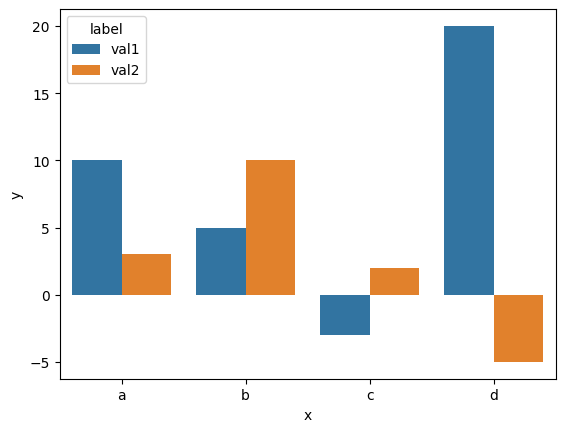

In [8]:
df1 = pd.DataFrame({
    "x": ["a", "b", "c", "d"],
    "y": [10, 5, -3, 20],
    "label": "val1",
})

df2 = pd.DataFrame({
    "x": ["a", "b", "c", "d"],
    "y": [3, 10, 2, -5],
    "label": "val2",
})

df = pd.concat([df1, df2], axis=0)

print("入力データ")
display(df)

fig, ax = plt.subplots()

sns.barplot(
    x="x",
    y="y",
    data=df,
    hue="label"
)

## ヒストグラム

### matplotlib
- 関数: `ax.hist`
- 入力データ: 1次元の配列

色分けしたい時は、必要なデータの種類だけ、`ax.hist`を実行する.

ヒストグラムの分割数は`bins`で指定する.

入力データ
[3.65618459 6.31051772 4.73626549 3.48508635 5.6896848 ] ...
[-1.92751156 -3.29621478 -3.44323088 -1.86213125 -1.37033874] ...


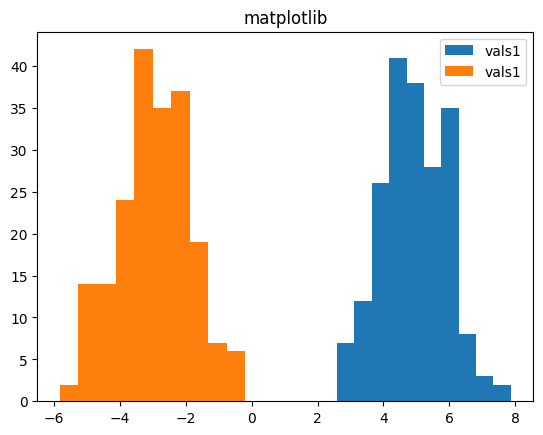

In [9]:
# 正規分布
vals1 = np.random.randn(200) + 5
vals2 = np.random.randn(200) -3

print("入力データ")
print(vals1[:5], "...")
print(vals2[:5], "...")

fig, ax = plt.subplots()
ax.hist(vals1, label="vals1")
ax.hist(vals2, label="vals1")

ax.set_title("matplotlib")
ax.legend()

plt.show()



### seaborn
- 関数: `sns.histplot`
- 入力データ: 1次元の配列, 必要に応じて色分け用の配列

色分けしたい場合、色分けのカラムを用意して`hue`引数を利用する.  
pandas DataFrameを利用して`data`引数に指定することで、軸に指定するデータを列名で代用できる

入力データ


,val,label
194,-2.954648,vals2
89,5.524913,vals1
169,5.206807,vals1
45,-1.889881,vals2
147,-3.302570,vals2


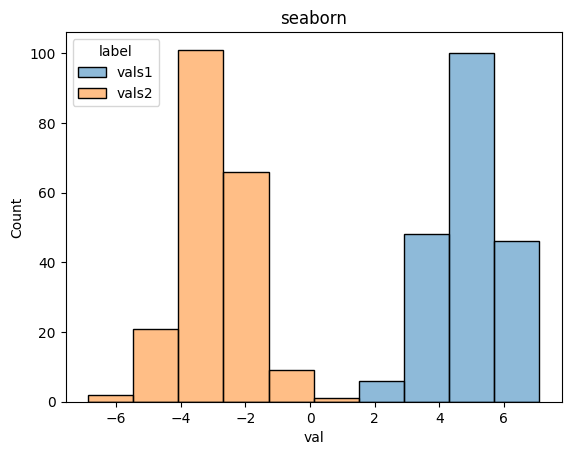

In [10]:
# 正規分布
df1 = pd.DataFrame({
    "val": np.random.randn(200) + 5,
    "label": "vals1",
})

df2 = pd.DataFrame({
    "val": np.random.randn(200) - 3,
    "label": "vals2",
})

df = pd.concat([df1, df2], axis=0)
print("入力データ")
display(df.sample(5))

fig, ax = plt.subplots()
sns.histplot(
    x="val",
    data=df,
    hue="label",
)

ax.set_title("seaborn")

plt.show()

## ヒートマップ

### matpltolib
- 関数: `ax.pcolor`
- 入力データ: 二次元配列


入力データ
形状: (30, 30)
[[0.29504906 0.91858797 0.08450941 0.06973743 0.66757902]
 [0.73615491 0.06461562 0.58560461 0.09086284 0.78619853]
 [0.25964951 0.94896754 0.28953017 0.70194685 0.65729985]
 [0.34197606 0.51905652 0.62852019 0.46057471 0.99928336]
 [0.03730587 0.10492044 0.0104654  0.93417138 0.51923544]]


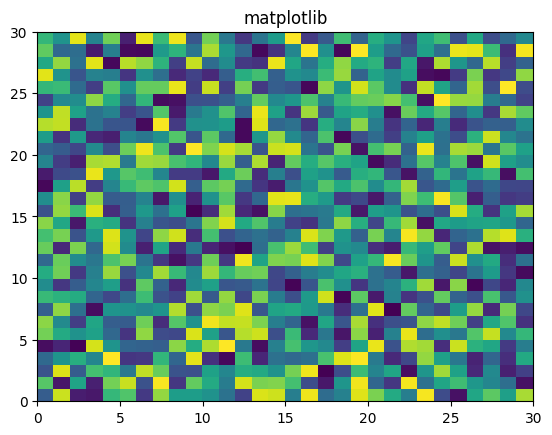

In [11]:
data = np.random.random((30, 30))
print("入力データ")
print("形状:", data.shape)
print(data[:5, :5])


fig, ax = plt.subplots()

ax.pcolor(data)

ax.set_title("matplotlib")

plt.show()

### seaborn

- 関数: `sns.heatmap`
- 入力データ: ２次元配列

入力データ
形状: (30, 30)
[[0.64804807 0.08068432 0.15258762 0.70552861 0.06445928]
 [0.24684074 0.96705262 0.37745737 0.59205776 0.30850745]
 [0.4905346  0.85067274 0.62193747 0.06778065 0.53929714]
 [0.32230646 0.26562932 0.9030934  0.35314366 0.66056872]
 [0.61970446 0.38717449 0.65639809 0.18550094 0.67816521]]


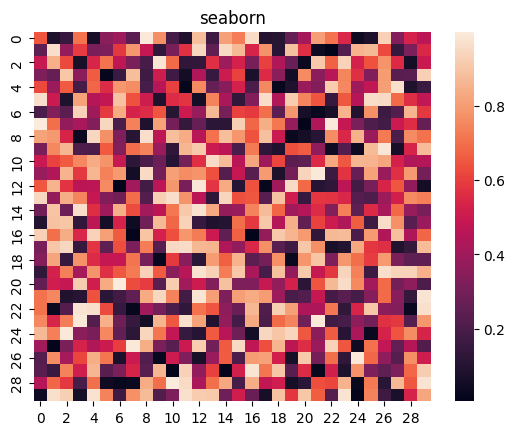

In [12]:
data = np.random.random((30, 30))
print("入力データ")
print("形状:", data.shape)
print(data[:5, :5])


fig, ax = plt.subplots()

sns.heatmap(data, ax=ax)

ax.set_title("seaborn")

plt.show()

基本的にはseabronとmatplotlibで何も変わらない。  
主な違いとしては以下

- seabronはカラーバーを生成する.
- `[0, 0]`の位置が異なる.
    - matplotlib: 左下
    - seaborn: 右上